<h1 style="text-align: center;"><center>Master&nbsp;in&nbsp;Interdisciplinary&nbsp;and&nbsp;Innovation&nbsp;Engineering Computer&nbsp;Vision</center></h1>
<h2 style="text-align: center;"><center><strong>Convolutional Neural Networks - Final Work</strong></center></h2>
<hr />
<p style="text-align: center;"><center><br />Departament de Matem&agrave;tiques (DMAT)<br />Escola d&rsquo;Enginyeria de Barcelona Est (EEBE)<br />Universitat Polit&egrave;cnica de Catalunya (UPC)<br />2023</center></p>



---
<strong><font color='cian'>STUDENTS: Anna Pallarès López and Eduard Martín Jiménez
</font></strong>

<h1> Final work </h1>

**Leukocytes** have a crucial role in the immune system. They help defend the body against infection and disease by identifying and attacking foreign substances such as bacteria, viruses, and other pathogens. There are five main types of leukocytes, each with distinct functions and characteristics: 

-  lymphocytes
-  monocytes
-  basophils 
-  eosinophils
-  neutrophils

Accurately identifying and classifying these leukocytes can be important in diagnosing and treating various diseases and conditions. For example, a high **neutrophil** count may be a sign of a bacterial infection, while a high **eosinophil** count may indicate an allergic reaction or parasitic infection.


<strong><font color=#ff0000>Instructions for the work:</font></strong>

In this final work, you will create a **Convolutional Neural Network (CNN)**  to classify the five main types of leukocytes.

1. Execute the code in sequential order. Write code when asked and solve the questions.
2. The dataset required is in the **dataset_leukocytes** folder in Atenea. Take some time to explore the images and familiarize with the type of cells.
3. The notebook can be executed in colab. Select a hardware accelerator like a **GPU** in colab to increase the speed of training phase. 

---
# 1. Data set
---

EXECUTE THIS CODE TO LOAD LIBRARIES AND DATASET:

In [ ]:
# -------------------------------Libraries ------------------------------------
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
from google.colab import drive

# ---------------------------- Set up Location ---------------------------------
drive.mount('/content/drive')
path = Path('/content/drive/MyDrive/I&I MASTER /Computer Vision/dataset_leukocytes')
folders = os.listdir(path)
data_f = []
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        data_f.append((img_path, folder))

Mounted at /content/drive


In [ ]:
# -------------------------- Dataframe and subsets -----------------------------
df = pd.DataFrame(data_f, columns=['image_path', 'label'])

training_data, test_df = train_test_split(df, test_size= 0.20, random_state= 42, stratify= df['label'])
train_df, val_df = train_test_split(training_data, test_size= 0.50, random_state= 42, stratify= training_data['label'])

train_df['set']='train_set'
val_df['set']='val_set'
test_df['set']='test_set'

df = pd.concat([train_df, val_df, test_df], ignore_index=True, sort=False)
df.head()

print(f"Training set: {len(train_df)} - {100*len(train_df)/(len(train_df)+len(val_df)+len(test_df))}%")
print(f"Validation set: {len(val_df)} - {100*len(val_df)/(len(train_df)+len(val_df)+len(test_df))}%")
print(f"Test set: {len(test_df)} - {100*len(test_df)/(len(train_df)+len(val_df)+len(test_df))}%")

Training set: 1000 - 40.0%
Validation set: 1000 - 40.0%
Test set: 500 - 20.0%


<strong><font color=#ff0000>Question 1 (1 pt):</font></strong> 

<strong><font color=#ff0000>What is the purpose of the library "from sklearn.model_selection import train_test_split"?</font></strong> 

***ANSWER TO QUESTION 1:***

The library `from sklearn.model_selection import train_test_split` has the aim of randomly split data (array or matrices) into different subsets, **training** and **test** in a quickly way by computing the train_test_split function.


The first subset (train_df) and the main one, which usually is the 70 % - 80 % of all the data, is used to train the model and therefore, to adjust the parameters (weights) of the model. 

On the other side, the data remaining is splited again to obtain the validation and test subsets. The validation set will be used to tune the model hyperparameters and the test will be used to asses the performance of the algorithm.

This action of splitting the data is crutial when building a model as it helps us to avoid overfitting. 
Overfitting occurs when we do not split the data into train and test sets. In this situation, the model would learn the parameters of a predicion function and would test it on the same data bunch, which is a methodological mistake.
This model would just repeat the labels of the samples that it has just seen and would have a perfect accuracy. However, it would fail to prefict anything on unseen data.

<strong><font color=#ff0000>Question 2 (1 pt):</font></strong> 

<strong><font color=#ff0000>What percentage of the total dataset is allocated to the train set, validation set, and test set?</font></strong> 

***ANSWER TO QUESTION 2:***

From the function of the code `training_data, test_df = train_test_split(df, test_size= 0.20, random_state= 42, stratify= df['label'])` we can observe that the whole data set is first split into 80-20. This means That the test_set represents the 20 % of the data.
Later, the following line of code is applied, `train_df, val_df = train_test_split(training_data, test_size= 0.50, random_state= 42, stratify= training_data['label'])`, which is splitting the training_set into train_df and val_df (validation) by a half (note the `=0.50`).
Therefore, the training subset represents the 40 % of the total image dataset and the validation subset the other 40 % of the images remaining.

We have to note that this splits are not the typical percentages of data associated to each subset. As we have commented in te previous image, the typical percentage that represents the training dataset is around 70-80 %. This value emerges due to the Pareto's Principle, which says thath the 80 % of the results can be explained with only a 20 % of the actions. 

However, in this first part of the work the splits are very far fromthe ones that are usually the optimal ones, so let's observe how the model behaves in the following code.

Summarizing:

| Train set | Validation set | Test set |
| --- | --- | --- |
| 40 % | 40 % | 20 % |








---
# 2. Load and process the data
---

EXECUTE THIS CODE TO SET UP PARAMETERS

neutrophil    500
lymphocyte    500
basophil      500
monocyte      500
eosinophil    500
Name: label, dtype: int64

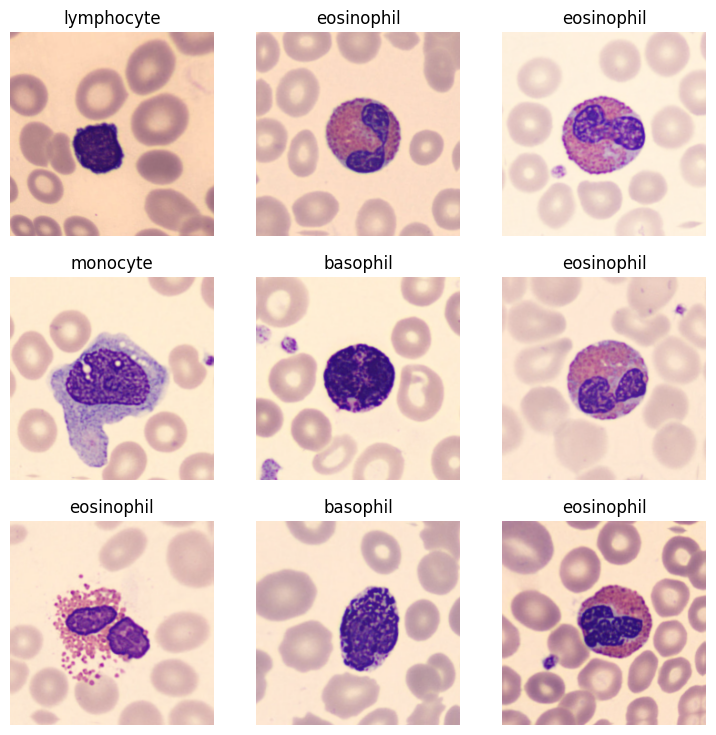

In [ ]:
from fastai.vision.all import *
batch_size = 32
train_idx = list(train_df.index)
val_idx = list(val_df.index)
data = ImageDataLoaders.from_df(df,
                                path = '/',
                                cols = 'image_path',
                                item_tfms=Resize(224),
                                batch_tfms = [*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
                                bs = batch_size,
                                train_idx = train_idx,
                                valid_idx = val_idx)
                                                             
data.show_batch()
df.label.value_counts()

<strong><font color=#ff0000>Question 3 (1 pt):</font></strong> 

<strong><font color=#ff0000>Do some research and explain with your own words what are the fastai ImageDataLoader and what are they used for?</font></strong> 

***ANSWER TO QUESTION 3:***

[Fastai](https://docs.fast.ai/#about-fastai) is a deep learning and machine learning library based on PyTorch, which is used in several deep learning applications and projects. 

ImageDataLoader is a class belonging to the vision.all module of the fastai library, which contains all the necessary functions to define a dataset and train the model for computer vision tasks (images). 

In particular, the functionality of ImageDataLoader is to load and preproces the images that are going to take part in the model.

This class needs different parameters such as the name of the dataframe, the path, the column where the path is specified in the image dataframe, the resize to do, the batch size, between others, which are essential for preparing the image data for training the model.

Sources:
[Medium](https://sadiva-madaan9.medium.com/a-beginners-guide-to-fastai-s-image-dataloaders-1f698c6f09eb)
[Atenea](https://atenea.upc.edu/mod/folder/view.php?id=4020019)






---
# 3. CNN structure
---

<strong><font color=#ff0000>Question 4 (1 pt):</font></strong> 

<strong><font color=#ff0000>Create a CNN model using the pretrained VGG16 architecture. Use the function to create fastai CNN, include in the arguments metrics=accuracy. Note: the network name in fastai is "vgg16"</font></strong> 

In [ ]:
# Answer to Question 4 here: 

from fastai.vision import models
learn = cnn_learner(data, vgg16, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██

---
# 4. Train the CNN
---



EXECUTE THIS CODE

In [ ]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.239203,0.498390,0.826000,05:06


<strong><font color=#ff0000>Question 5 (1 pt):</font></strong> 

<strong><font color=#ff0000>What is the difference between using `learn.finetune` and `learn.fit` in the context of training a deep learning model?</font></strong> 

***ANSWER TO QUESTION 5:***

`learn.fit` and `learn.finetune` are both methods from the library fastai used to train a model. 

One one hand, `learn.fit` is used to train a model strarting from zero, what means that the initial weights are set randomly and that they are updatde to minimize the cross-entropy function. This method is useful when we want to train a yet unseen model.

On the other hand, `learn.finetune` does the same with the difference that uses the weights of an already pretrained model as initial point. From this starting point, the weights are updated on the new data set (what is also known as fine-tunning). This method is useful and can be very accurate if we want to improve the performance of a pretrained model on a related task. Otherwise, it is recommended to use `lean.fit`, as we are doing in this work.






<strong><font color=#ff0000>Question 6 (1 pt):</font></strong> 

<strong><font color=#ff0000>After training for 1 epoch, what was the accuracy value obtained and on which dataset was it calculated: train or validation?</font></strong> 

***ANSWER TO QUESTION 6:***

After training for 1 single epoch, the accuracy obtained on the validation set is about a 82.6 %. 

As said, this accuracy is calculated over the validation dataset. By default, `metrics` are computed on the validation set only, although that can be changed by adjusting train_metrics and valid_metrics. 

Note that, the real accuracy in which we are interested in, is the accuracy calculate in the test subset, which is computed below.

Source: [Fastai Metrics](https://docs.fast.ai/learner.html#metric)

---
# 5. Evaluate the CNN on the test set
---

In [ ]:
test_dl = learn.dls.test_dl(test_df, with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

<strong><font color=#ff0000>Question 7 (2 pt):</font></strong> 

<strong><font color=#ff0000>Calculate the confusion matrix, precision, recall, f1-score and SPECIFICITY by class, and the overall accuracy. Interpret the results</font></strong>  

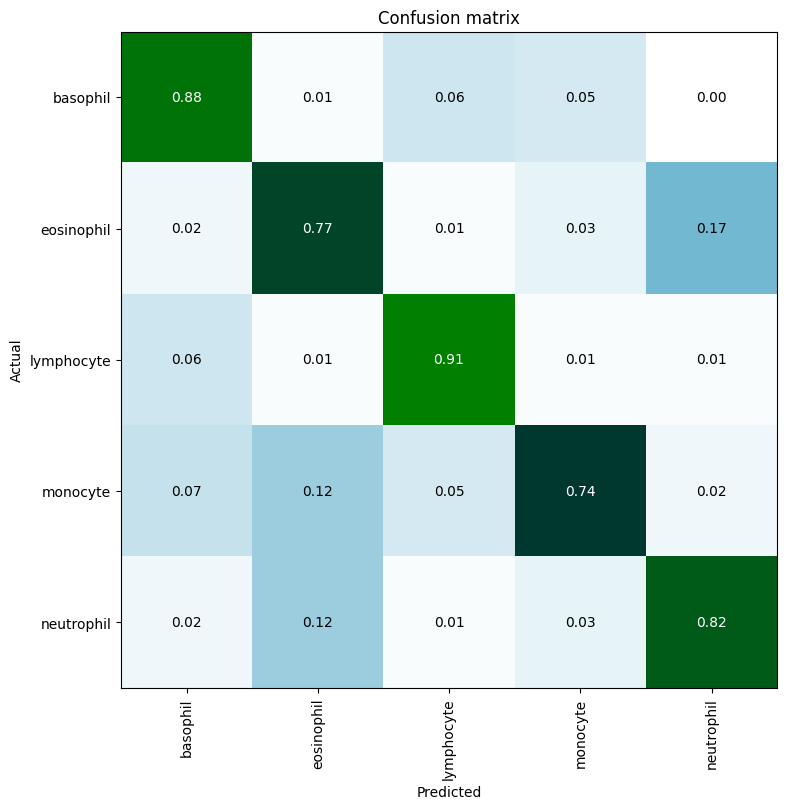

In [ ]:
interp.plot_confusion_matrix(figsize = (8,8), normalize = True, norm_dec = 2, cmap = 'ocean_r')

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    basophil       0.84      0.88      0.86       100
  eosinophil       0.75      0.77      0.76       100
  lymphocyte       0.88      0.91      0.89       100
    monocyte       0.86      0.74      0.80       100
  neutrophil       0.80      0.82      0.81       100

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



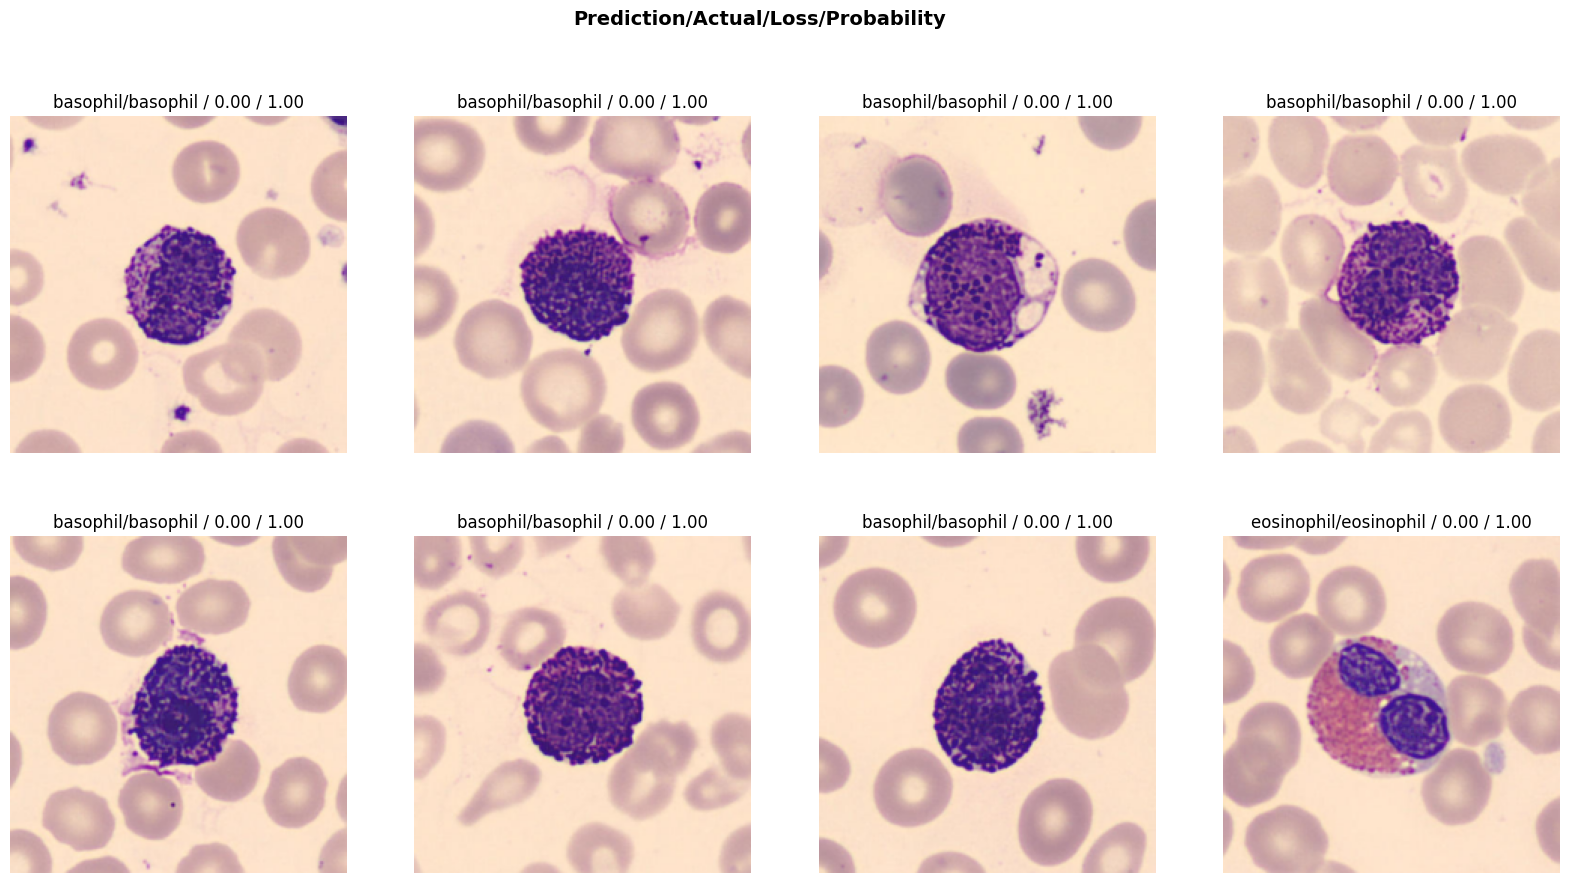

In [ ]:
interp.plot_top_losses(8, largest=False, figsize = (20,10)) # Best

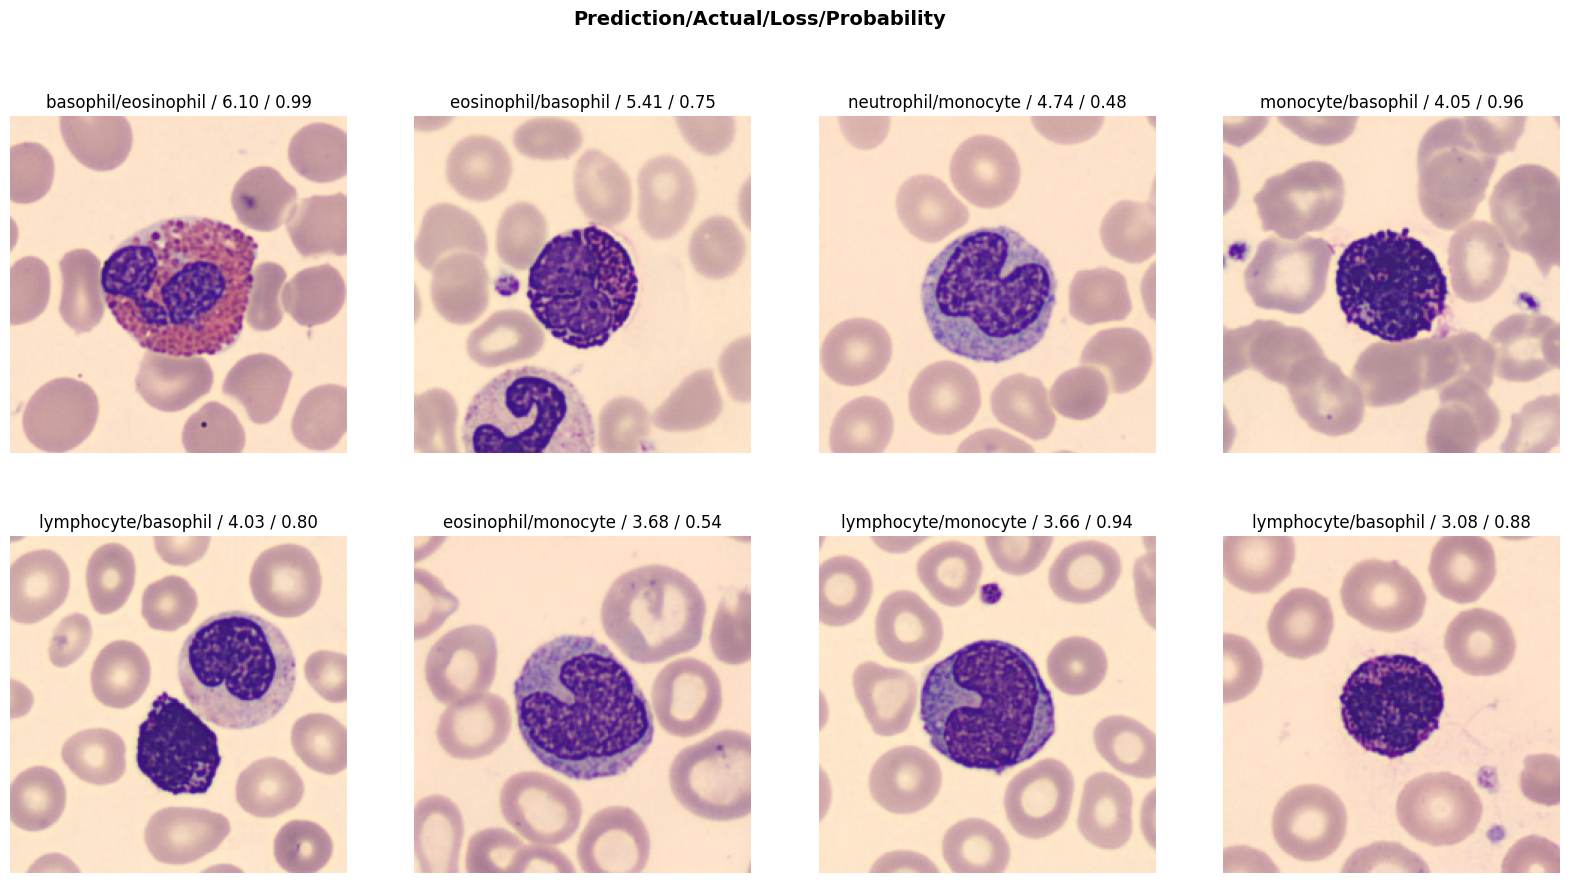

In [ ]:
interp.plot_top_losses(8, largest=True, figsize = (20,10)) # Worse

In [30]:
# SPECIFICITY

# We built the conffussion matrix by hand (note: we could also have done this with the function recorder from fastain to store the values)

import numpy as np
conffusion_matrix = np.array([[ 0.88, 0.01, 0.06, 0.05, 0.00],
                              [ 0.02, 0.77, 0.01, 0.03, 0.17],
                              [ 0.06, 0.01, 0.91, 0.01, 0.01],
                              [ 0.07, 0.12, 0.05, 0.74, 0.02],
                              [ 0.02, 0.12, 0.01, 0.03, 0.82]])

# Store the number of leukocyte classes
num_classes = conffusion_matrix.shape[0]

# Compute the specificity for each class:
for i in range(num_classes):
    TN = np.sum(np.delete(np.delete(conffusion_matrix, i, axis=0), i, axis=1))
    FP = np.sum(conffusion_matrix[:, i])-conffusion_matrix[i, i]
    Specificity = TN / (TN + FP)
    print(f"The specificity for class {i+1}: {Specificity:.2f}")


The specificity for class 1: 0.96
The specificity for class 2: 0.94
The specificity for class 3: 0.97
The specificity for class 4: 0.97
The specificity for class 5: 0.95


***ANSWER TO QUESTION 7: INTERPRETATION OF RESULTS***

**1.   Confussion matrix**

The confusion matrix is a table that is used to evaluate the performance of a classification multiclass model. It is a matrix of true and predicted class labels, where each cell in the matrix represents the number of samples that were classified as belonging to a particular true class and a particular predicted class.

The rows of the matrix represent the true classes, and the columns represent the predicted classes. The diagonal of the matrix shows the number of samples that were correctly classified, while the off-diagonal elements show the number of samples that were misclassified. Therefore, if our model would work perfectly accurate, the values of the diagonal will be 1 while the other cells will be 0.

This tool is also useful to identify which classes are confused with others.

In our case we can observe thath our model works good in predicting the  **bashopil**, **lymphociyte**, and **neutrophil** classes, as the accuracy is **0.88**, **0.90**, and **0.82** respectively. However, we have to note that they are not so high, what makes us think that the model is not very well bulit.

On the other hand, the worse predictions correspond those to the **eosinophil** and **monocyte** classes, as they are highly confused with eachother. 

This wrong predictions could be explained due to the similitude in its nucleous shape. Even though monocyte nucleous is bigger that eosinophil's one, both have the nucleous in a c-shape, which can be confusing. For this reason, we will highly recommend not to consider the predictions in these clases, as the percentage of being confounded is too high.

--

**2.   Classification report**

The dataframe returned after executing this function, summarizes ia table the quantitative metrics such as the precision, recall, f1-score and accuracy for each predicted class and for the whole model. In the same way as the conffusion matrix, it allows us to observe how good is the model when predicting the different classes in the test subset.

--

**3.   Best predictions**

This function plots the 8 best predicted images and their corresponding loss and probability values.
The parameter “largest”, determines whether to plot the images with the larges or smaller loss value (In this case, “False”, will plot the images with the smallest loss values.)
The loss function is a measure of how well a machine learning model is able to make predictions, and a lower loss value indicates that the model is making better predictions.
By plotting the images with the lowest loss values, we can identify potential errors in the model's predictions and make adjustments to improve its performance.

In our case, the 8 best images in this classification task have a loss function value of 0.00, it suggests that the model is making perfect predictions for these images. However, it is important to note that a loss function value of 0.00 does not guarantee that the model is perfect for all images or for the task as a whole. Therefore, additional evaluation metrics should be used to assess the model's overall performance, such as the confussion matrix, the overall accuracy, etc.

--

**4.   Worst predictions**

The “Worst” function plots the 8 images with the highest loss values, indicating the images for which the model has made the most significant prediction errors. 

In this case, the largest loss value is 6.99, which suggests that the model struggled to correctly classify that particular image, as well as in the other images displayed.

In the same was as for the "Best Predicions" (but oposite), a high loss function value does not necessarily mean that the model is completely inaccurate or that the image is unrecognizable. As in all models, it is uncertain or confused about how to classify a particular image. However, these predicions could help us to discover why the model is failing in those particular images, and help us to understand its behavior for future improvements on the architecture.

--

**5. The Specificity**

The specificity is another evaluation metric which can be computed according to:

                                             Specificity = TN / TN+FP,

and it is defined as the proportion of true negatives that are correctly identified by the model.

Since the conffusion matrix contains the values for the true negatives as well as for the false positives, we can compute the specificity for each class using the equation avobe. The results are listed below.


    The specificity for class 1: 0.96
    The specificity for class 2: 0.94
    The specificity for class 3: 0.97
    The specificity for class 4: 0.97
    The specificity for class 5: 0.95


Since the specificity is an indicator of how many false positive results where given, we can conclude that we have a very specific test as the results are close to 1.

--

**6. The overall accuracy**

The classification report returns, between others, the overall accuracy of the model. In this training, we have obtained a global accuracy for the test dataset of 82%. 

Note that the overall accuracy is just the average of the accuracy achieved for each class. Therefore we can state that monocyte and eosinophil predicted classes have affect negatively to the performance of the model, as both of them have the lowest accuracy of the five classes, i.e. 74 and 77%.

In clonclusion, the training model has a decent accuracy but may not be used to predict all the classes.














---
# 6. Alternative code - split 80/10/10
---

<strong><font color=#ff0000>Question 8 (2 pt):</font></strong> 

<strong><font color=#ff0000>Create a new code, modifying the partition percentage of the original set and the number of training epochs until obtaining the best possible classification results, with particular attention to the true positive rate TPR for each class. Analyze the results obtained.</font></strong> 

In [ ]:
#  We have reset all the runtime environment and run the modified code:

# -------------------------------Libraries ------------------------------------
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
from google.colab import drive

# ---------------------------- Set up Location ---------------------------------
drive.mount('/content/drive')
path = Path('/content/drive/MyDrive/I&I MASTER /Computer Vision/dataset_leukocytes') # change depending on the location of the database
folders = os.listdir(path)
data_f = []
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        data_f.append((img_path, folder))

# -------------------------- Dataframe and subsets ------------------------------
df = pd.DataFrame(data_f, columns=['image_path', 'label'])

train_df, test_df = train_test_split(df, test_size = 0.20, random_state = 42, stratify = df['label'])
val_df, test_df = train_test_split(test_df, test_size = 0.50, random_state = 42, stratify = test_df['label'])

train_df['set']='train_set'
val_df['set']='val_set'
test_df['set']='test_set'
df = pd.concat([train_df, val_df, test_df], ignore_index=True, sort=False)
df.head()

print(f"Training set: {len(train_df)} - {100*len(train_df)/(len(train_df)+len(val_df)+len(test_df))}%")
print(f"Validation set: {len(val_df)} - {100*len(val_df)/(len(train_df)+len(val_df)+len(test_df))}%")
print(f"Test set: {len(test_df)} - {100*len(test_df)/(len(train_df)+len(val_df)+len(test_df))}%")

# ------------------------- Load and Process data -----------------------------
from fastai.vision.all import *
batch_size = 32
train_idx = list(train_df.index)
val_idx = list(val_df.index)
data = ImageDataLoaders.from_df(df,
                                path = '/',
                                cols = 'image_path',
                                item_tfms=Resize(224),
                                batch_tfms = [*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
                                bs = batch_size,
                                train_idx = train_idx,
                                valid_idx = val_idx)
                                                             
data.show_batch()
df.label.value_counts()

# ----------------------------- Architrcture -----------------------------------
from fastai.vision import models
learn = cnn_learner(data, vgg16, metrics=accuracy)

# ------------------------------- Training -------------------------------------
learn.fit(5)

# ----------------------------- Evaluation -------------------------------------
test_dl = learn.dls.test_dl(test_df, with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

interp.plot_confusion_matrix(figsize = (8,8), normalize = True, norm_dec = 2, cmap = 'ocean_r')
interp.print_classification_report()
interp.plot_top_losses(8, largest=False, figsize = (20,10)) # Best
interp.plot_top_losses(8, largest=True, figsize = (20,10)) # Worse

Output hidden; open in https://colab.research.google.com to view.

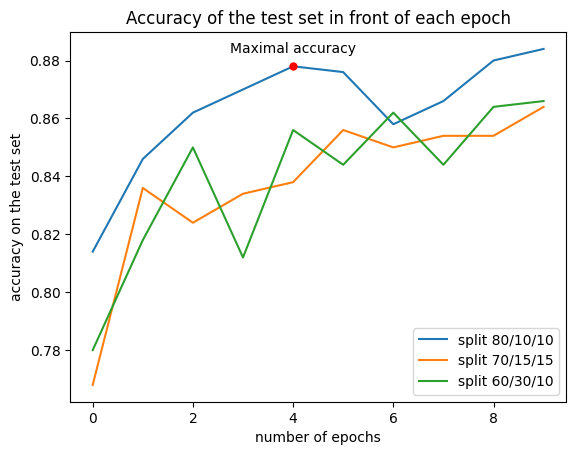

In [31]:
# Plot to compare the accuracy in front the number of epochs made for each confiuration 
import matplotlib.pyplot as plt
import numpy as np

# Note that the numbers below are the ones obtained when he code was executed. They were stored in another document and they have been now copied manually to do the plot.

accuracy_conf1 = np.array([0.814, 0.846, 0.862, 0.870, 0.878, 0.876, 0.858, 0.866, 0.880, 0.884])
accuracy_conf2 = np.array([0.768, 0.836, 0.824, 0.834, 0.838, 0.856, 0.850, 0.854, 0.854, 0.864])
accuracy_conf3 = np.array([0.780, 0.818, 0.850, 0.812, 0.856, 0.844, 0.862, 0.844, 0.864, 0.866])
epochs = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.plot(epochs, accuracy_conf1, label = 'split 80/10/10')
plt.plot(epochs, accuracy_conf2, label = 'split 70/15/15')
plt.plot(epochs, accuracy_conf3, label = 'split 60/30/10')
plt.plot(4, 0.878, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

plt.annotate('Maximal accuracy', 
             (4,0.878), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')  

plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('accuracy on the test set')
plt.title('Accuracy of the test set in front of each epoch')
plt.show()

***ANSWER TO QUESTION 8:***

**Methodology**

The number of epochs and the partition percentage of the image dataset play a very important role on the model's performance. In order to study how this two parameters affect on the model, we have executed the given code for three different split configurations and 10 epochs for each.


| Configuration | Train set | Validation set | Test set |
| ---| --- | --- | --- |
| Configuration 1| 80% | 10% | 10% |
| Configuration 2| 70% | 15% | 15% |
| Configuration 3| 60% | 30% | 10% |

--

**Results**

After executing the code and observing the accuracy achieved on the training we got these results.

| Configuration| First Max Accuracy | Corresponding # epoch  | 
| ---| --- | --- |
| Configuration 1| 0.878 | 4 | 
| Configuration 2| 0.836 | 1 | 
| Configuration 3| 0.850 | 2  | 


Observing the results, for three cases we got the accuracies over each epoch. We took for each case the optimal number of epochs as the epoch which corresponded to the first maximal accuracy. This criteria is because if we only considered the global maximal accuracy, the model would be overfitted.

Therefore, we can easily observe that the best model is the one which is splited with the 80% of the data for the training, and the other 20% remaining for the validation and test subsets.

We can also observe the results obtained graphically with the plot displaye above.

After proving which split configuration made the model perform the best, we repeated the training using the number of optimal epochs observed, i.e. 5 (4+1) epochs. Finally, we have achieved an overall accuracy of the model of 90% on the test set.

--

**Discussion**

This overall accuracy (which is calculated and returend by the classification report function) has been negatively affected by the predictions on the monocyte class, as the accuracy for this particular cell is as low as 74%. Therefore, this has made decrease the good performance of the trained model.This bad performance is because the algorithm confuses this cell with other cells, such as basophyls (10% confounded), limphocytes (8% confounded) and neutrophils (6% confounded). These conffusions may be due to the simmilarity of these three blood cells in their nucleous c-shaped.

Moreover, if we take particular attention to the true positive rate (also known as sensitivity or recall), we observe, form the evaluation report, that monocyte class has a very low sensitivity, with a value of a 0.74. 
Since the true positive rate is the probability of a positive test result (ratio of true positives to total positive sin data), we can state that the algorithm does not return most of the relevant results for this particular class.
However, the recall or sensitivity for the other classes are considerably high, in particular for the lymphocyte class.



--

**Conclusions**

In conclusion, by modifying the partitions and adjusting the epochs, we have found the optimal configuration (or nearly the optimal), by achieving an increase of the accuracy of a 8%.
However, the accuracy of a particular class, monocyte, is very low and makes decrease the accuracy of the whole model. Moreover, we have found that the sensitivity for this particular class is also low, which makes the algorithm to ignore relevant results.

Hence, if we had to sell our trained model, we will advice not to use it for monocyte predictions, as there would be a chance of a 26% that the model is wrong. For a future work, this could be improved by adjusting in more depth the architecture of the present convolutional neural network.










In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/CV_CNNfinalwork')

In [ ]:
learn.export('/content/drive/MyDrive/Colab Notebooks/CV_CNNfinalwork')

    Convolutional Neural Networks assignment

    Authors: Anna Pallares and Eduard Martin

    May, 5th 2023